## Build the perfect model to save Hamid !

### Step 1: Explore the Dataset

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import os
from sqlalchemy import create_engine
from scipy.stats import chi2_contingency
df = pd.read_csv('bricolo_company_test.csv')
df.head()


# read the dataset and try to explore it through pandas methods.

,id,satisfied,evaluation,projects,work_hours,total_time_spent,had_accident,got_promoted,department,salary_range
0,1,NaN,0.96,"Penalizing System,Smurfs,AiFest23, SecCamp ,...",226,2,1,0,marketing,medium
1,2,0.88,0.80,"Drug Design,Farmy,SecCamp",166,2,0,0,IT,low
2,3,0.69,0.98,"SecCamp ,Smurfs ,WebCamp",214,2,0,0,sales,low
3,4,0.41,0.47,"SecCamp , AiFest23",154,3,0,0,sales,low
4,5,0.87,0.76,"Penalizing System,Salah lFrog,WebCamp, AiFest...",254,2,1,0,hr,low


In [141]:
#get number of rows and columns
print(df.shape) 
print(df.columns)
print(df.describe())

(4500, 10)
Index(['id', 'satisfied', 'evaluation', 'projects', 'work_hours',
       'total_time_spent', 'had_accident', 'got_promoted', 'department',
       'salary_range'],
      dtype='object')
                id   evaluation   work_hours  total_time_spent  had_accident  \
count  4500.000000  4500.000000  4500.000000       4500.000000   4500.000000   
mean   2250.500000     0.715447   201.338667          3.489111      0.142000   
std    1299.182435     0.170775    50.081285          1.456677      0.349089   
min       1.000000     0.360000    96.000000          2.000000      0.000000   
25%    1125.750000     0.560000   156.000000          3.000000      0.000000   
50%    2250.500000     0.720000   200.000000          3.000000      0.000000   
75%    3375.250000     0.870000   245.000000          4.000000      0.000000   
max    4500.000000     1.000000   310.000000         10.000000      1.000000   

       got_promoted  
count   4500.000000  
mean       0.020444  
std        0.1415

In [142]:
#check invalid values in satisfied column 
column_values = df['satisfied']

# Initialize a counter for null values
null_count = 0
wrong_value=0

# Iterate over the values in the column
for value in column_values:
    if pd.isnull(value):
        # If value is null, increment the null count
        null_count += 1
    else:
        # If value is not null, check if it matches the format '0..anynumber'
        if isinstance(value, str) and value.startswith('0..'):
            wrong_value+=1
            print(value)

print("Null count:", null_count)
print("wrong count:", wrong_value)

0..12
0..63
0................18
0....99
0..89
0..09
0....43
0..83
0..85
0....43
0..62
0....4
0..54
0....96
0....78
0................18
0..59
0................44
0................94
0................9
0..87
0....67
0................96
0..75
0....99
0....09
0..64
0....65
0..61
0....91
0................39
0..98
0..62
0....84
0....43
0................37
0..09
0..4
0..72
0....7
0................76
0..78
0....49
0..86
0....99
0..89
0....88
0..25
0................13
0..61
0....56
0....76
0................7
0..4
0................5
0....7
0..86
0................21
0..96
0....76
0................55
0................36
0..94
0................42
0..71
0....8
0................1
0..49
0................95
0..77
0..55
0....45
0....61
0..22
0................38
0..52
0....48
0....78
0....42
0..69
0..8
0..59
0..46
0................37
0..51
0..62
0....24
0................77
0..78
0................42
0..1
0..45
0..21
0..93
0..41
0....49
0..49
0..57
0................68
0................88
0..61
0...........

In [143]:
#3- Remove duplicates if any and preview the data
print(len(df))
df = df.drop_duplicates()
df.head()
# Replace 'your_dataset.csv' with your actual dataset file name or path

# Plot a histogram of 'still_working' by 'satisfied'

4500


,id,satisfied,evaluation,projects,work_hours,total_time_spent,had_accident,got_promoted,department,salary_range
0,1,NaN,0.96,"Penalizing System,Smurfs,AiFest23, SecCamp ,...",226,2,1,0,marketing,medium
1,2,0.88,0.80,"Drug Design,Farmy,SecCamp",166,2,0,0,IT,low
2,3,0.69,0.98,"SecCamp ,Smurfs ,WebCamp",214,2,0,0,sales,low
3,4,0.41,0.47,"SecCamp , AiFest23",154,3,0,0,sales,low
4,5,0.87,0.76,"Penalizing System,Salah lFrog,WebCamp, AiFest...",254,2,1,0,hr,low


### Step 2: Preprocessing phase

In [144]:
#replace the null values in the dataset in satisfied column , with the average 
#calcluate the average of satisfied
# Filter 'satisfied' column for values in the format of 0.number
filtered_values = df['satisfied'].str.match(r'^0\.\d+$')
# Calculate the average of the filtered values
average_satisfied = filtered_values.mean()
print(average_satisfied)

0.9486668327934213


In [145]:
#change value null to average
df = df.fillna(average_satisfied)
print(df['satisfied'])

0       0.948667
1           0.88
2           0.69
3           0.41
4           0.87
          ...   
4495        0.85
4496        0.21
4497        0.78
4498        0.93
4499        0.64
Name: satisfied, Length: 4500, dtype: object


In [146]:
# Check invalid values in the 'satisfied' column
column_values = df['satisfied']

# Initialize counters for null values and wrong values
null_count = 0
wrong_value = 0

# Iterate over the values in the column
for value in column_values:
    if pd.isnull(value):
        # If value is null, increment the null count
        null_count += 1
    elif isinstance(value, str) and value.startswith('0..'):
        # If value is not null and starts with '0..', increment the wrong value count
        wrong_value += 1

print("Null count:", null_count)
print("Wrong count:", wrong_value)
# Replace the wrong values in the 'satisfied' column with the average
df.loc[df['satisfied'].str.contains('^[0-9]\.\.', na=False), 'satisfied'] = average_satisfied

print(df['satisfied'])
   

df.head(60)

Null count: 0
Wrong count: 167
0       0.948667
1           0.88
2           0.69
3           0.41
4           0.87
          ...   
4495        0.85
4496        0.21
4497        0.78
4498        0.93
4499        0.64
Name: satisfied, Length: 4500, dtype: object


,id,satisfied,evaluation,projects,work_hours,total_time_spent,had_accident,got_promoted,department,salary_range
0,1,0.948667,0.96,"Penalizing System,Smurfs,AiFest23, SecCamp ,...",226,2,1,0,marketing,medium
1,2,0.88,0.80,"Drug Design,Farmy,SecCamp",166,2,0,0,IT,low
2,3,0.69,0.98,"SecCamp ,Smurfs ,WebCamp",214,2,0,0,sales,low
3,4,0.41,0.47,"SecCamp , AiFest23",154,3,0,0,sales,low
4,5,0.87,0.76,"Penalizing System,Salah lFrog,WebCamp, AiFest...",254,2,1,0,hr,low
5,6,0.72,0.88,"AiFest23,SecCamp , Drug Design",224,3,0,0,technical,low
6,7,0.98,0.78,"WebCamp, SecCamp , Penalizing System,Raid Dor...",155,3,1,0,technical,low
7,8,0.17,0.76,"Penalizing System, Penalizing System,SecCamp ...",280,5,0,0,hr,low
8,9,0.2,0.98,"Penalizing System,Smurfs ,Raid Dorms Cook,S...",166,4,1,0,sales,medium
9,10,0.16,0.90,"Raid Dorms Cook,Penalizing System, AiFest23 ...",258,3,0,0,technical,medium


In [147]:
print(df['satisfied'].head(30))

0     0.948667
1         0.88
2         0.69
3         0.41
4         0.87
5         0.72
6         0.98
7         0.17
8          0.2
9         0.16
10        0.77
11        0.67
12        0.54
13        0.77
14        0.74
15    0.948667
16        0.73
17        0.49
18        0.92
19        0.76
20    0.948667
21        0.43
22        0.11
23        0.75
24        0.45
25        0.85
26    0.948667
27        0.64
28        0.65
29    0.948667
Name: satisfied, dtype: object


In [148]:
# consider removing irrelevent data
# if you explored the data well, you would figure out 
# which columns does not affect the decision making
#drop total_time_spent
#df = df.drop('total_time_spent', axis=1)

In [149]:
print(df.columns)

Index(['id', 'satisfied', 'evaluation', 'projects', 'work_hours',
       'total_time_spent', 'had_accident', 'got_promoted', 'department',
       'salary_range'],
      dtype='object')


In [150]:
# now, consider the salary range
# find out a way to transform those categories into
# what usually a ML model expects
#low =0 ,high =1,medium=0.5
replacement_mapping = {'low': 0, 'high': 1, 'medium': 0.5}

# Replace the values in the 'salary' column using the mapping dictionary
df['salary_range'] = df['salary_range'].replace(replacement_mapping)

# Print the updated DataFrame to verify the changes
print(df['salary_range'].head(40))

0     0.5
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.5
9     0.5
10    0.5
11    0.5
12    0.5
13    0.5
14    0.5
15    0.0
16    1.0
17    0.0
18    0.5
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.5
28    0.0
29    0.5
30    0.5
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.5
37    1.0
38    0.5
39    0.0
Name: salary_range, dtype: float64


In [151]:
# let's move now to handling the department column
# find out a manner to re-strcture your dataset by 
# transforming the deparmtent column into a more suitable format
departments = df['department'].unique()
print(departments)

['marketing' 'IT' 'sales' 'hr' 'technical' 'support' 'management'
 'accounting' 'product_mng' 'RandD']


In [152]:
# Perform one-hot encoding on the "department" column
df_encoded = pd.get_dummies(df['department'], prefix='department')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Print the modified DataFrame
print(df.head())

   id satisfied  evaluation  \
0   1  0.948667        0.96   
1   2      0.88        0.80   
2   3      0.69        0.98   
3   4      0.41        0.47   
4   5      0.87        0.76   

                                            projects  work_hours  \
0    Penalizing System,Smurfs,AiFest23, SecCamp ,...         226   
1                         Drug Design,Farmy,SecCamp          166   
2                          SecCamp ,Smurfs  ,WebCamp         214   
3                              SecCamp ,  AiFest23           154   
4  Penalizing System,Salah lFrog,WebCamp,  AiFest...         254   

   total_time_spent  had_accident  got_promoted department  salary_range  \
0                 2             1             0  marketing           0.5   
1                 2             0             0         IT           0.0   
2                 2             0             0      sales           0.0   
3                 3             0             0      sales           0.0   
4                 2     

In [153]:
# now check the projects column
# inspect it really WELL, then see how you can exploit it
project_types = ['WebCamp', 'Raid Dorms Cook', 'Salah lFrog', 'AiFest23', 'Penalizing System', 'SecCamp', 'Farmy', 'Smurfs', 'Drug Design']

# Initialize the "project_count" column with zeros

# Iterate through each row
for index, row in df.iterrows():
    # Split the projects string and remove leading/trailing spaces
    projects = [project.strip() for project in row['projects'].split(',')]
    
    # Count the number of projects that match the project types
    count = sum(project in project_types for project in projects)
    
    # Assign the count to the "project_count" column for that row
    df.at[index, 'projects'] = count

# Print the updated dataset with the project counts
print(df)

        id satisfied  evaluation projects  work_hours  total_time_spent  \
0        1  0.948667        0.96        5         226                 2   
1        2      0.88        0.80        3         166                 2   
2        3      0.69        0.98        3         214                 2   
3        4      0.41        0.47        2         154                 3   
4        5      0.87        0.76        5         254                 2   
...    ...       ...         ...      ...         ...               ...   
4495  4496      0.85        0.81        4         260                 3   
4496  4497      0.21        0.43        2         249                 3   
4497  4498      0.78        0.53        3         156                 3   
4498  4499      0.93        0.58        5         238                 2   
4499  4500      0.64        0.55        3         246                 2   

      had_accident  got_promoted   department  salary_range  department_IT  \
0                1   

In [154]:
# Now check the dataset again
# Is there anything you can do to the dataset  
# REMEMBER: garbage-in garbage-out
#check the unique for each column
unique_values_dict = {}
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_counts = df[column].value_counts()
    unique_values_dict[column] = {'Unique Values': unique_values, 'Count': unique_values_counts}
print(unique_values_dict)

{'id': {'Unique Values': array([   1,    2,    3, ..., 4498, 4499, 4500], dtype=int64), 'Count': 1       1
2999    1
3005    1
3004    1
3003    1
       ..
1506    1
1507    1
1508    1
1509    1
4500    1
Name: id, Length: 4500, dtype: int64}, 'satisfied': {'Unique Values': array([0.9486668327934213, '0.88', '0.69', '0.41', '0.87', '0.72', '0.98',
       '0.17', '0.2', '0.16', '0.77', '0.67', '0.54', '0.74', '0.73',
       '0.49', '0.92', '0.76', '0.43', '0.11', '0.75', '0.45', '0.85',
       '0.64', '0.65', '0.82', '0.53', '0.8', '0.38', '0.96', '0.83',
       '0.1', '0.94', '0.47', '0.7', '0.27', '0.71', '0.39', '0.24',
       '0.86', '0.37', '0.15', '0.9', '0.81', '0.79', '0.55', '1.0',
       '0.42', '0.89', '0.66', '0.59', '0.97', '0.95', '0.84', '0.33',
       '0.48', '0.63', '0.99', '0.5', '0.56', '0.93', '0.78', '0.57',
       '0.31', '0.4', '0.36', '0.44', '0.14', '0.09', '0.52', '0.32',
       '0.34', '0.23', '0.68', '0.25', '0.62', '0.51', '0.3', '0.6',
       '0.61', '0.9

In [155]:
#drop got promoted 
df = df.drop('got_promoted', axis=1)

In [158]:
df = df.drop('department', axis=1)
print(df.columns)

Index(['id', 'satisfied', 'evaluation', 'projects', 'work_hours',
       'total_time_spent', 'had_accident', 'salary_range', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')


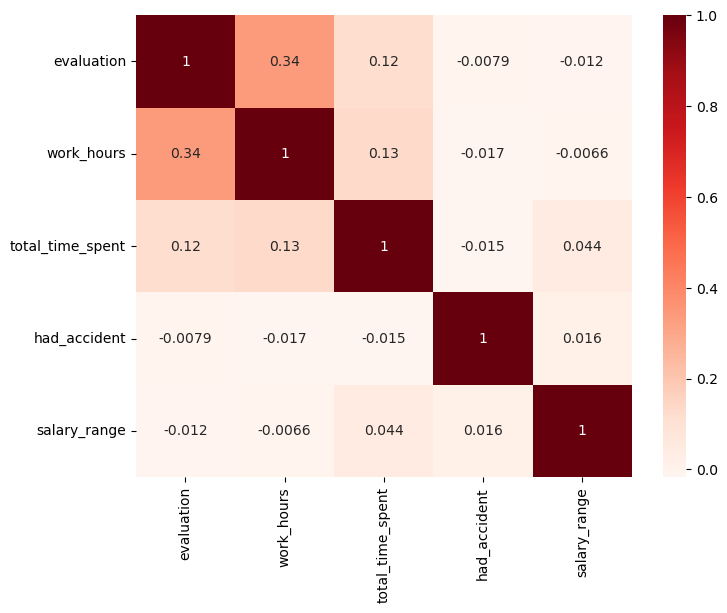

In [159]:
import seaborn as sns 
categorical_columns=['projects','id','department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical']
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(categorical_columns, axis=1).corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Step 3: Now, comes the modeling !

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score

# using the current state of your dataset,
# find out which model yields maximum accuracy and recall
# those imported libraries shall help you with that 



In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
#Train and test set
# Split the dataset into features (X) and target variable (y)
X = df
print(X)
df.to_excel('test.xlsx', index=False)

        id satisfied  evaluation projects  work_hours  total_time_spent  \
0        1  0.948667        0.96        5         226                 2   
1        2      0.88        0.80        3         166                 2   
2        3      0.69        0.98        3         214                 2   
3        4      0.41        0.47        2         154                 3   
4        5      0.87        0.76        5         254                 2   
...    ...       ...         ...      ...         ...               ...   
4495  4496      0.85        0.81        4         260                 3   
4496  4497      0.21        0.43        2         249                 3   
4497  4498      0.78        0.53        3         156                 3   
4498  4499      0.93        0.58        5         238                 2   
4499  4500      0.64        0.55        3         246                 2   

      had_accident  salary_range  department_IT  department_RandD  \
0                1           0

### Now, you should be ready to submit !

In [600]:
# As you know, we are using Kaggle.
# So make sure that you (as a team leader) had added every team member to your team inside the competition
# Next, you need to assess your model on the testing dataset (i.e bricolo_company_test.csv)
# you are required to predict the still_working value for each row

# Once done, you need to submit a csv sheet having the following format:
# two columns: id and still_working
# id means the id of that row in the testing dataset
# still_working is the predicted value (either 0 or 1)
# the following sample submission code shall help:
# (We are assuming that the testing dataset is cleaned and loaded in the variable X_test)
#evaluate
X_test.reset_index(drop=True, inplace=True)

# Make predictions on the test set
predictions = model.predict(X_test)

# test_data is the variable holding the testing data
my_submission = pd.DataFrame({'id': df['id'][:len(X_test)], 'still_working': predictions})
my_submission.to_csv('submission.csv', index=False)

# Now, you've got to submit submission.csv
